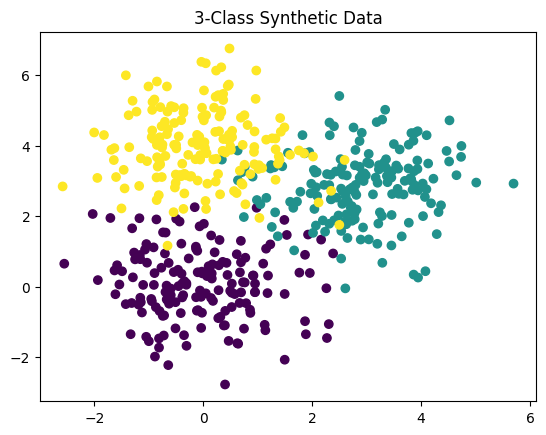

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)


class1 = np.random.randn(166, 2) + np.array([0, 0])
class2 = np.random.randn(167, 2) + np.array([3, 3])
class3 = np.random.randn(167, 2) + np.array([0, 4])


X = np.vstack((class1, class2, class3))
Y = np.array([0]*166 + [1]*167 + [2]*167)


Y_onehot = np.zeros((Y.size, 3))
Y_onehot[np.arange(Y.size), Y] = 1

plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis')
plt.title("3-Class Synthetic Data")
plt.show()


In [2]:
class NeuralNetwork3Layer:
    def __init__(self, input_size=2, hidden1_size=10, hidden2_size=8, output_size=3, lr=0.1):

        self.lr = lr


        self.W1 = np.random.randn(input_size, hidden1_size)
        self.W2 = np.random.randn(hidden1_size, hidden2_size)
        self.W3 = np.random.randn(hidden2_size, output_size)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):

        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)


        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)


        self.z3 = np.dot(self.a2, self.W3)
        self.a3 = self.sigmoid(self.z3)
        return self.a3

    def backPropagation(self, X, Y, pred):

        error_out = Y - pred
        delta_out = error_out * self.sigmoid(pred, der=True)


        error_h2 = np.dot(delta_out, self.W3.T)
        delta_h2 = error_h2 * self.sigmoid(self.a2, der=True)


        error_h1 = np.dot(delta_h2, self.W2.T)
        delta_h1 = error_h1 * self.sigmoid(self.a1, der=True)

        self.W3 += self.lr * np.dot(self.a2.T, delta_out)
        self.W2 += self.lr * np.dot(self.a1.T, delta_h2)
        self.W1 += self.lr * np.dot(X.T, delta_h1)

    def train(self, X, Y, epochs=5000):
        losses = []
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = np.mean(np.square(Y - pred))
            losses.append(loss)
            if i % 500 == 0:
                print(f"Epoch {i} | Loss: {loss:.4f}")
        return losses


Epoch 0 | Loss: 0.4011
Epoch 500 | Loss: 0.0353
Epoch 1000 | Loss: 0.0339
Epoch 1500 | Loss: 0.0326
Epoch 2000 | Loss: 0.0320
Epoch 2500 | Loss: 0.0318
Epoch 3000 | Loss: 0.0316
Epoch 3500 | Loss: 0.0316
Epoch 4000 | Loss: 0.0315
Epoch 4500 | Loss: 0.0314


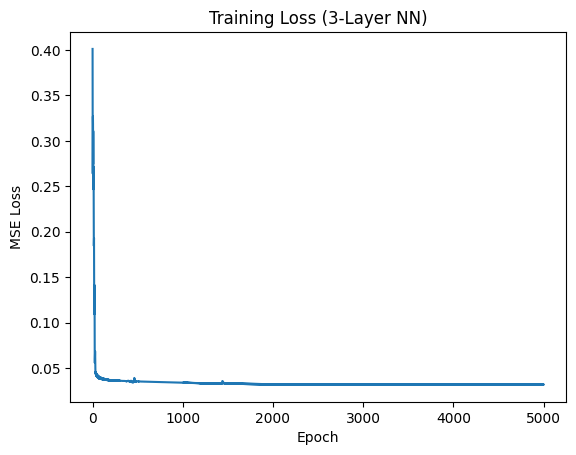

In [6]:
NN = NeuralNetwork3Layer(lr=0.05)
losses = NN.train(X, Y_onehot, epochs=5000)

plt.plot(losses)
plt.title("Training Loss (3-Layer NN)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


In [5]:
test_points = np.array([[0, 0], [3, 3], [0, 4]])
for point in test_points:
    pred = NN.feedForward(point.reshape(1, -1))
    print(f"Input: {point} -> Predicted class: {np.argmax(pred)}")


Input: [0 0] -> Predicted class: 0
Input: [3 3] -> Predicted class: 1
Input: [0 4] -> Predicted class: 2
